# K-Means Clustering

In [176]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [177]:
#data load
dataset = pd.read_csv(r'D:\ML&AI\Batch1\04.Machine Learning\05.Unsupervised Learning\Classes\Mall_Customers_to1qc.csv')

In [178]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [179]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


In [180]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


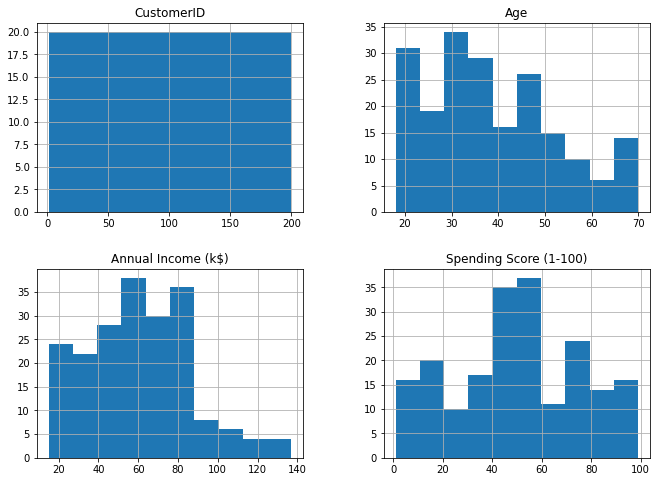

In [181]:
dataset.hist(figsize=(11,8))
plt.show()

In [182]:
# Just considering required features
X = dataset.iloc[:,3:]

In [183]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [184]:
wcss = [] # within cluster sum of squares

In [185]:
# Finding best values for K. b/w 1 - 10
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #within cluster sum of squares

In [186]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30259.657207285458,
 25011.839349156595,
 21850.16528258562,
 19672.07284901432]

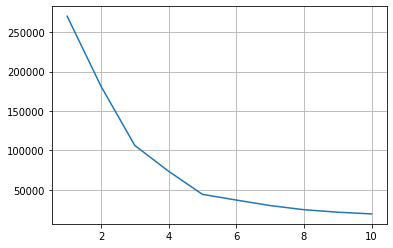

In [187]:
plt.plot(range(1,11), wcss)
plt.grid()
plt.show()

In [188]:
#Considered K=6 as its best fit - there is no significant change in the wcss or inertia
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)

In [189]:
# predicted clasifications/clusters
y_kmeans = kmeans.fit_predict(X)

In [190]:
# 6 clusters for all rows 
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 0, 5, 1, 5, 0, 5, 0, 5,
       1, 5, 0, 5, 0, 5, 0, 5, 0, 5, 1, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5,
       0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5,
       0, 5, 0, 5, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [191]:
X.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

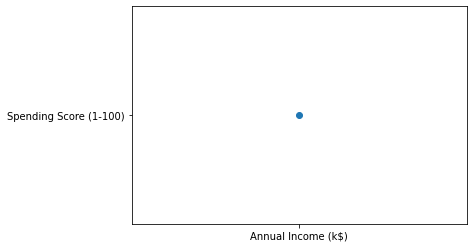

In [192]:
plt.scatter('Annual Income (k$)', 'Spending Score (1-100)')
plt.show()

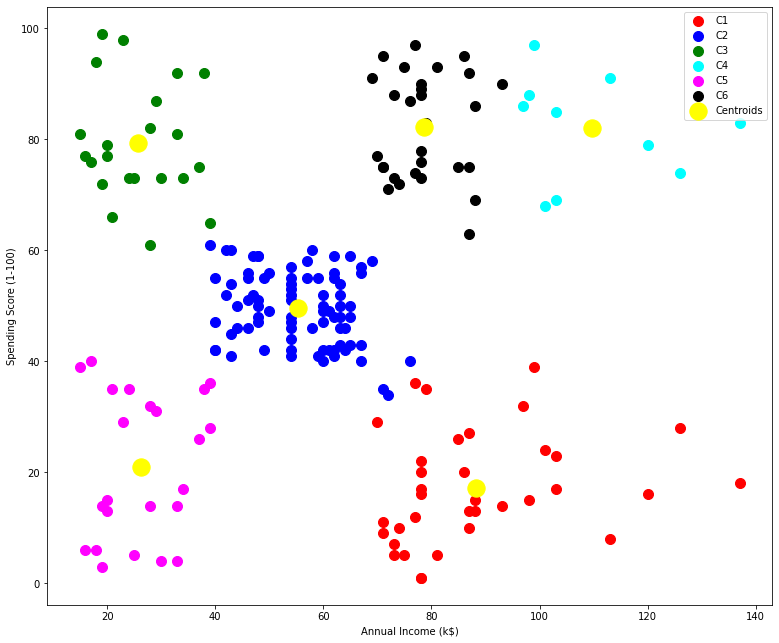

In [193]:
#Ploting to see the clusters predicted
plt.figure(figsize=(13,11))
plt.scatter(X[y_kmeans==0]['Annual Income (k$)'],X[y_kmeans==0]['Spending Score (1-100)'],s=100,c='red',label='C1')
plt.scatter(X[y_kmeans==1]['Annual Income (k$)'],X[y_kmeans==1]['Spending Score (1-100)'],s=100,c='blue',label='C2')
plt.scatter(X[y_kmeans==2]['Annual Income (k$)'],X[y_kmeans==2]['Spending Score (1-100)'],s=100,c='green',label='C3')
plt.scatter(X[y_kmeans==3]['Annual Income (k$)'],X[y_kmeans==3]['Spending Score (1-100)'],s=100,c='cyan',label='C4')
plt.scatter(X[y_kmeans==4]['Annual Income (k$)'],X[y_kmeans==4]['Spending Score (1-100)'],s=100,c='magenta',label='C5')
plt.scatter(X[y_kmeans==5]['Annual Income (k$)'],X[y_kmeans==5]['Spending Score (1-100)'],s=100,c='black',label='C6')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## End  